<h1><center>Analysis of the used car market in Poland

### <center> Mateusz Gabryel

In [3]:
# activate virutal environment on Windows OS
!..\venv\Scripts\activate

In [ ]:
# install neccessary packages
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install plotly

In [96]:
# import neccessary packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [37]:
# import data from CSV file
data = pd.read_csv(filepath_or_buffer="../data/Car_Prices_Poland_Kaggle.csv", sep=",")
print(data)

        Unnamed: 0   mark  model    generation_name  year  mileage  \
0                0   opel  combo         gen-d-2011  2015   139568   
1                1   opel  combo         gen-d-2011  2018    31991   
2                2   opel  combo         gen-d-2011  2015   278437   
3                3   opel  combo         gen-d-2011  2016    47600   
4                4   opel  combo         gen-d-2011  2014   103000   
...            ...    ...    ...                ...   ...      ...   
117922      117922  volvo  xc-90  gen-ii-2014-xc-90  2020    40000   
117923      117923  volvo  xc-90  gen-ii-2014-xc-90  2017    51000   
117924      117924  volvo  xc-90  gen-ii-2014-xc-90  2016    83500   
117925      117925  volvo  xc-90  gen-ii-2014-xc-90  2017   174000   
117926      117926  volvo  xc-90  gen-ii-2014-xc-90  2016   189020   

        vol_engine      fuel              city       province   price  
0             1248    Diesel             Janki    Mazowieckie   35900  
1             1

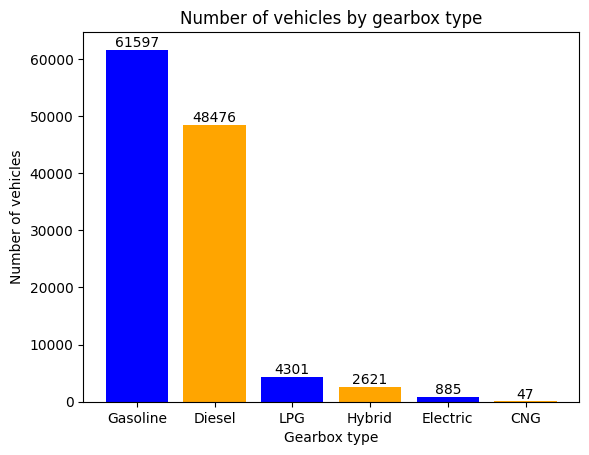

In [38]:
car_gearbox_data = data["fuel"].value_counts()
gearbox_types = car_gearbox_data.index
counts_gearboxes = car_gearbox_data.values

colors = ["blue", "orange"]
plt.bar(gearbox_types, counts_gearboxes, color=colors)

plt.title("Number of vehicles by gearbox type")
plt.xlabel("Gearbox type")
plt.ylabel("Number of vehicles")

for gearbox_type, count_gearbox in enumerate(car_gearbox_data):
    plt.text(gearbox_type, count_gearbox, count_gearbox, ha="center", va="bottom")
    
plt.show()

From the graph created, we can see that there are more vehicles with manual transmission on the used car market, exactly **12161**.

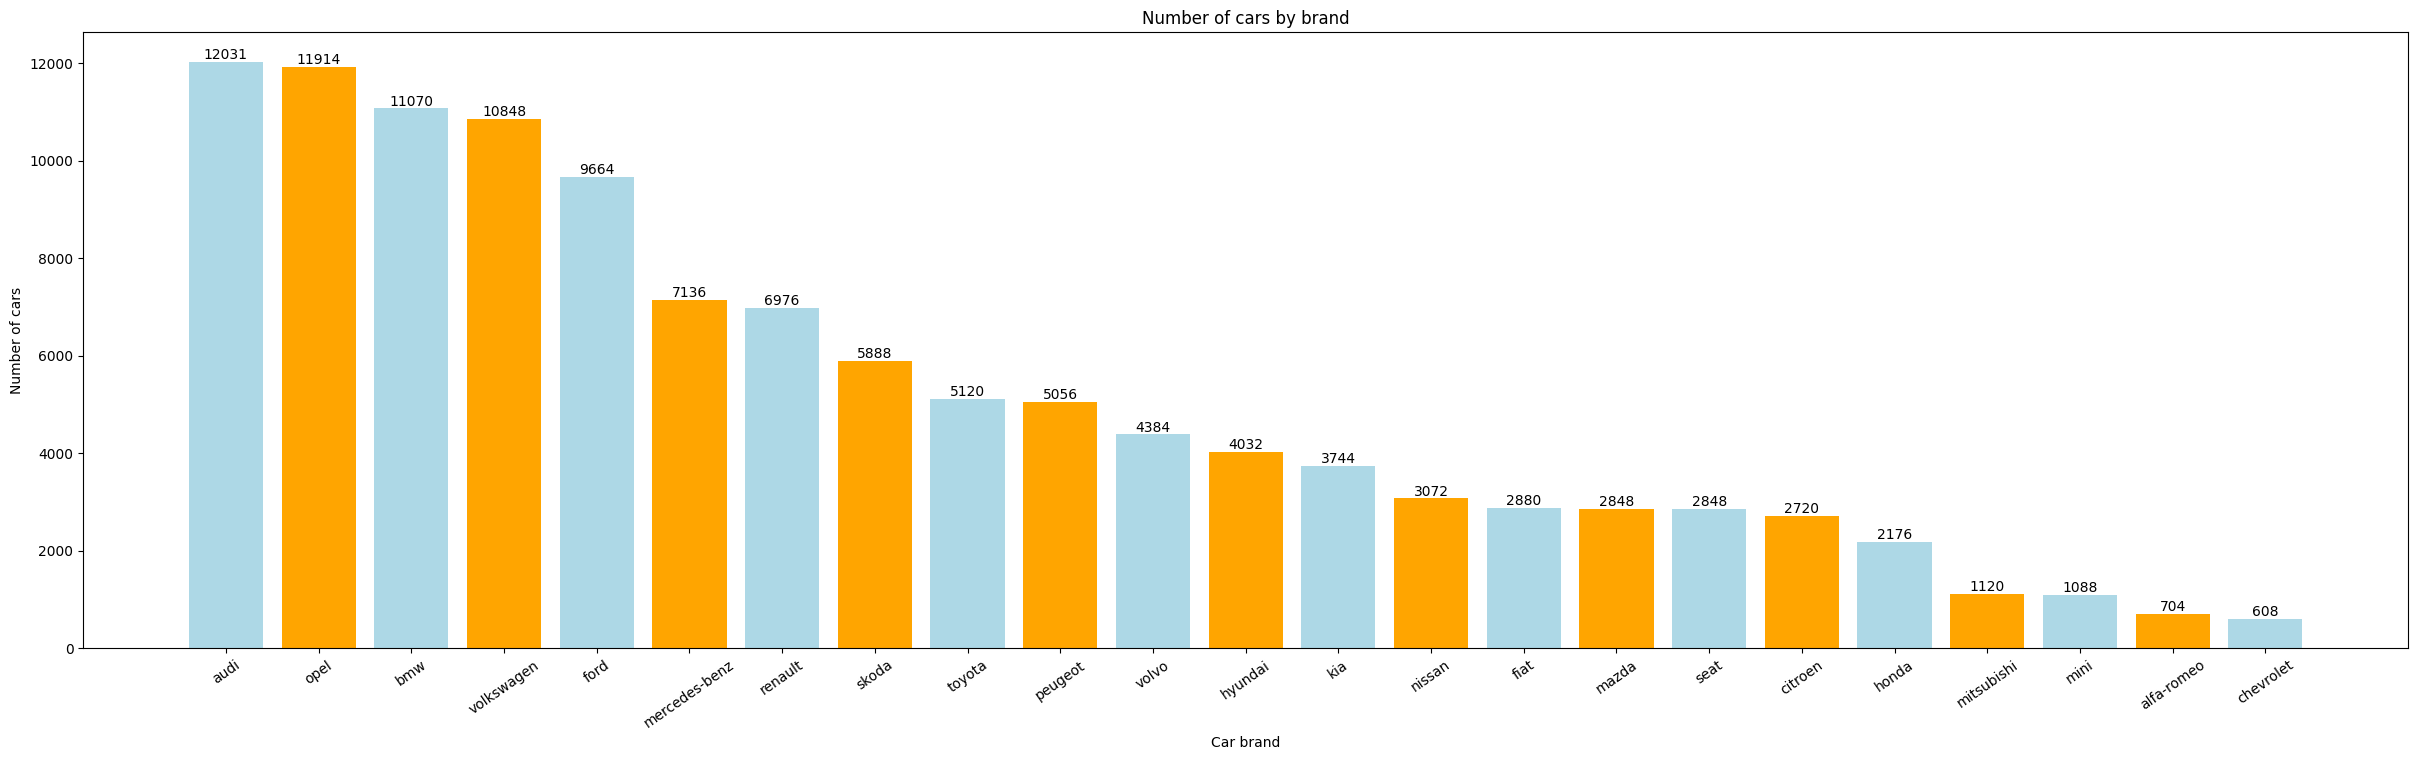

In [39]:
car_brands_data = data["mark"].value_counts()
brand_types = car_brands_data.index
counts_brands = car_brands_data.values

colors = ["lightblue", "orange"]

plt.figure(figsize=(30, 8))  # define size of plot
plt.bar(brand_types, counts_brands, color=colors)
plt.xticks(rotation=35, ha="center")

plt.title("Number of cars by brand")
plt.xlabel("Car brand")
plt.ylabel("Number of cars")

for brand_type, count_brand in enumerate(car_brands_data):
    plt.text(brand_type, count_brand, count_brand, ha="center", va="bottom")

plt.show()

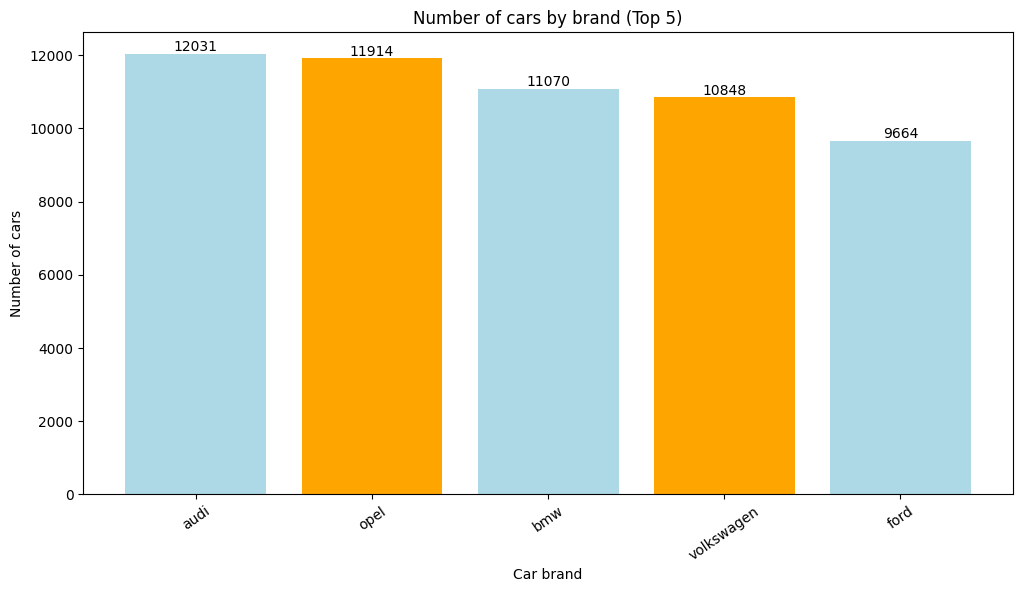

In [40]:
top_5_brands_data = car_brands_data.head(5)
brand_types = top_5_brands_data.index
counts_brands = top_5_brands_data.values

colors = ["lightblue", "orange"]

plt.figure(figsize=(12, 6))  # define size of plot
plt.bar(brand_types, counts_brands, color=colors)
plt.xticks(rotation=35, ha="center")

plt.title("Number of cars by brand (Top 5)")
plt.xlabel("Car brand")
plt.ylabel("Number of cars")

for brand_type, count_brand in enumerate(counts_brands):
    plt.text(brand_type, count_brand, count_brand, ha="center", va="bottom")

plt.show()


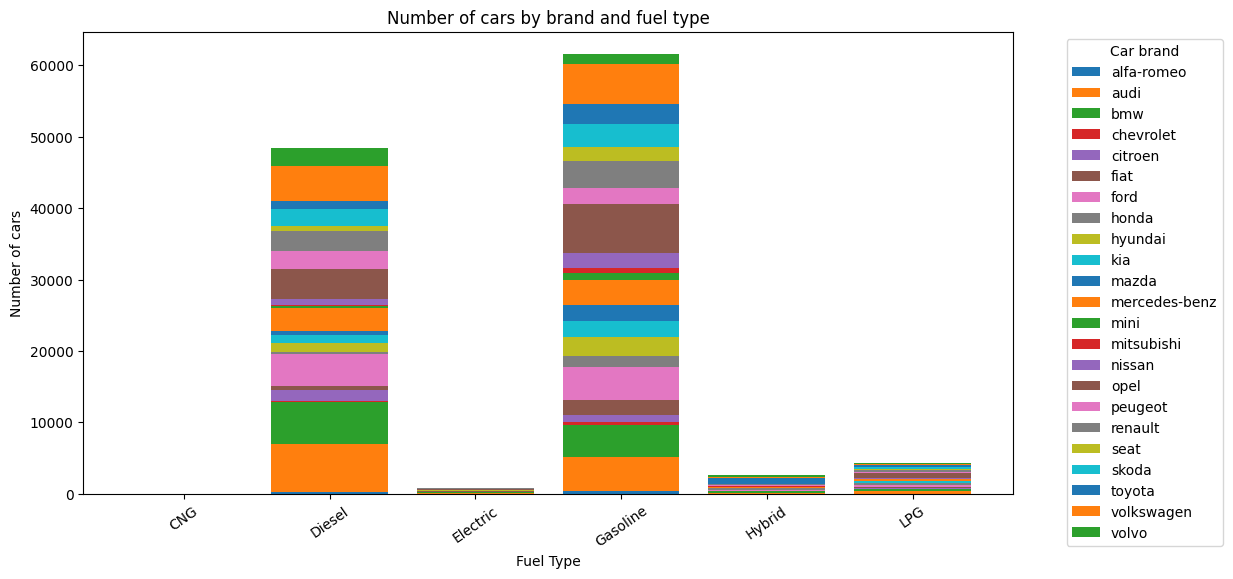

In [75]:
brand_fuel_counts = data.groupby(['mark', 'fuel']).size().unstack(fill_value=0)

# Step 2: Plot the grouped bar plot
plt.figure(figsize=(12, 6))

# Iterate through each brand
for i, brand in enumerate(brand_fuel_counts.index):
    fuel_types = brand_fuel_counts.columns
    counts = brand_fuel_counts.loc[brand].values
    bottom = brand_fuel_counts.iloc[:i].sum(axis=0).values if i > 0 else None

    plt.bar(fuel_types, counts, bottom=bottom, label=brand)

plt.xticks(rotation=35, ha="center")
plt.title("Number of cars by brand and fuel type")
plt.xlabel("Fuel Type")
plt.ylabel("Number of cars")
plt.legend(title="Car brand", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

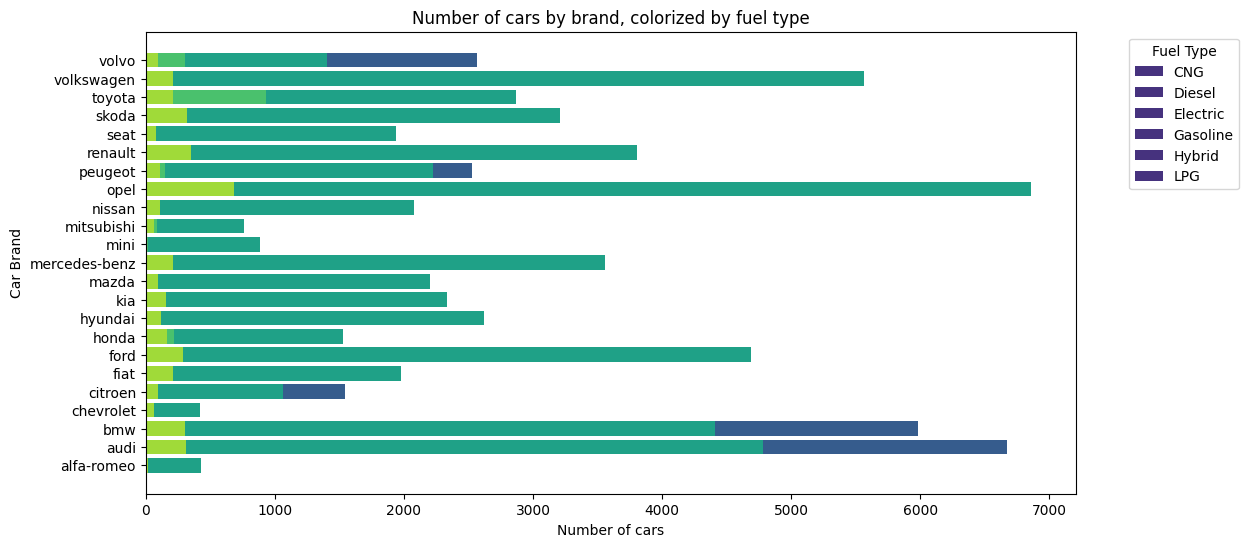

In [81]:
brand_fuel_counts = data.groupby(['mark', 'fuel']).size().unstack(fill_value=0)

# Step 2: Plot the horizontal grouped bar plot
plt.figure(figsize=(12, 6))

# Iterate through each brand
for i, brand in enumerate(brand_fuel_counts.index):
    fuel_types = brand_fuel_counts.columns
    counts = brand_fuel_counts.loc[brand].values

    plt.barh(brand, counts, color=sns.color_palette("viridis", n_colors=len(fuel_types)))

plt.title("Number of cars by brand, colorized by fuel type")
plt.xlabel("Number of cars")
plt.ylabel("Car Brand")


plt.legend(title="Fuel Type", bbox_to_anchor=(1.05, 1), loc='upper left', labels=fuel_types)

plt.show()

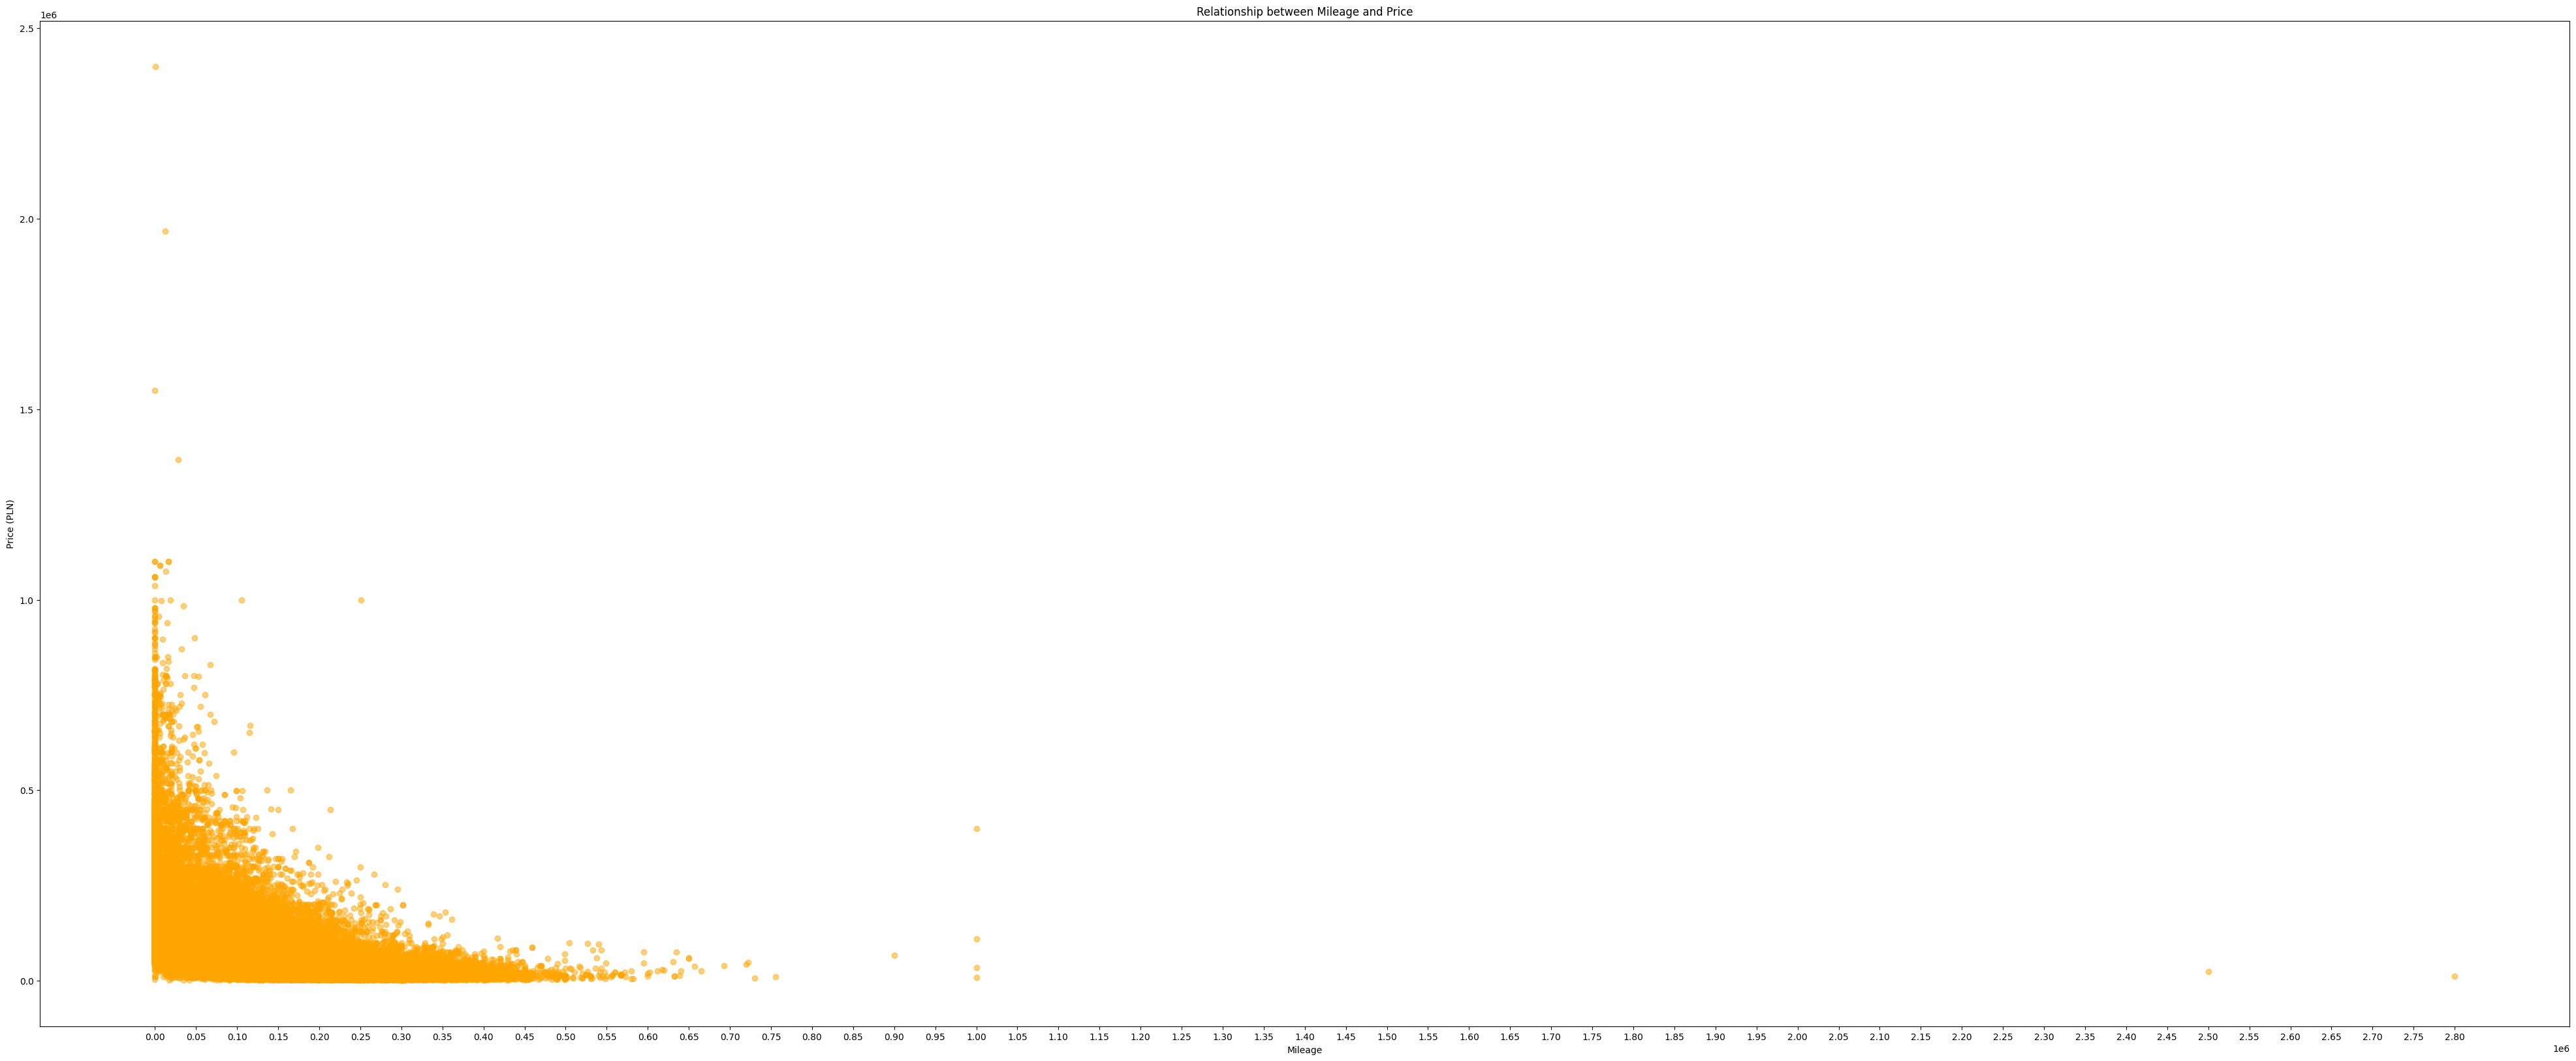

In [44]:
plt.figure(figsize=(50, 20))
plt.scatter(data['mileage'], data['price'], alpha=0.5, color='orange')
plt.title('Relationship between Mileage and Price')
plt.xlabel('Mileage')
plt.ylabel('Price (PLN)')
plt.xticks(range(0, int(max(data['mileage'])) + 1, 50000))
plt.show()

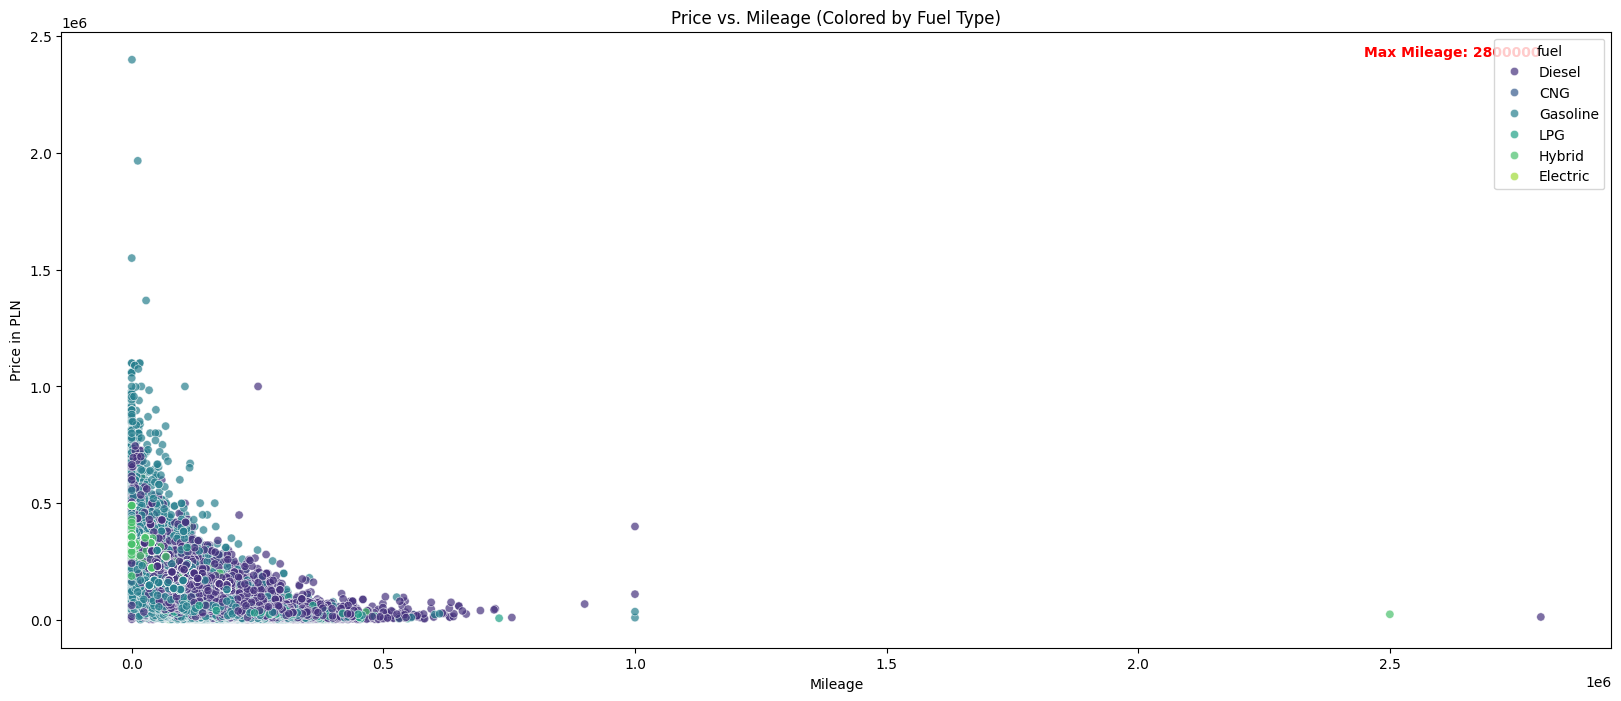

In [62]:
plt.figure(figsize=(20, 8))

sns.scatterplot(x='mileage', y='price', hue='fuel', data=data, palette='viridis', alpha=0.7)

max_mileage_index = data['mileage'].idxmax()
max_mileage = data.loc[max_mileage_index, 'mileage']
plt.text(max_mileage, data['price'].max(), f'Max Mileage: {max_mileage:.0f}', 
         color='red', ha='right', va='bottom', fontsize=10, weight='bold')

plt.title('Price vs. Mileage (Colored by Fuel Type)')
plt.xlabel('Mileage')
plt.ylabel('Price in PLN')
plt.show()

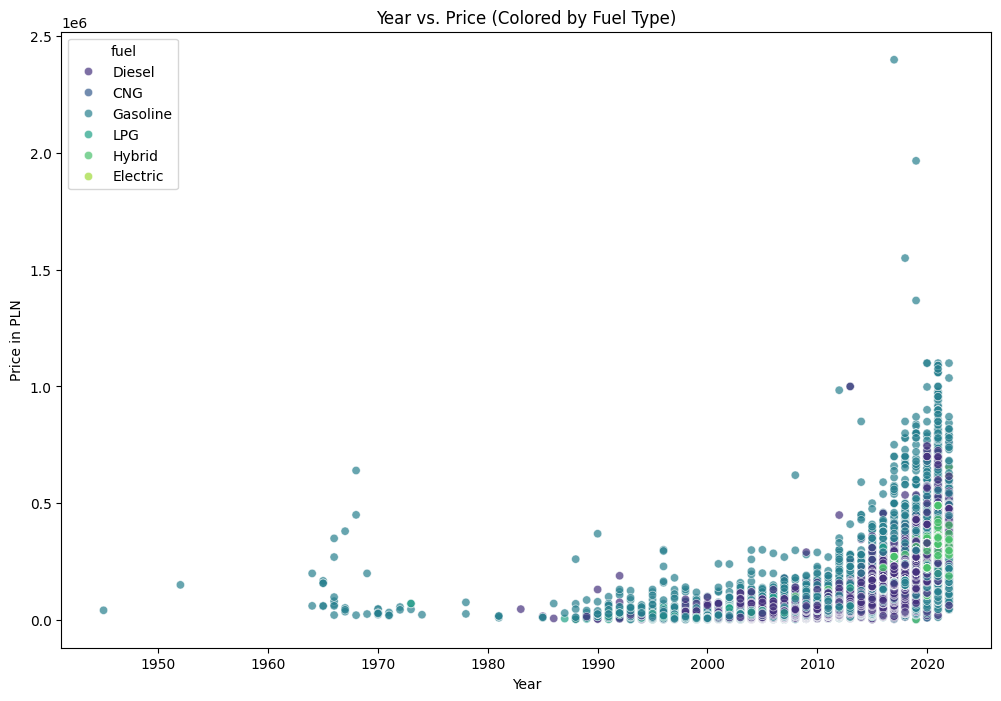

In [47]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='year', y='price', hue='fuel', data=data, palette='viridis', alpha=0.7)
plt.title('Year vs. Price (Colored by Fuel Type)')
plt.xlabel('Year')
plt.ylabel('Price in PLN')
plt.show()

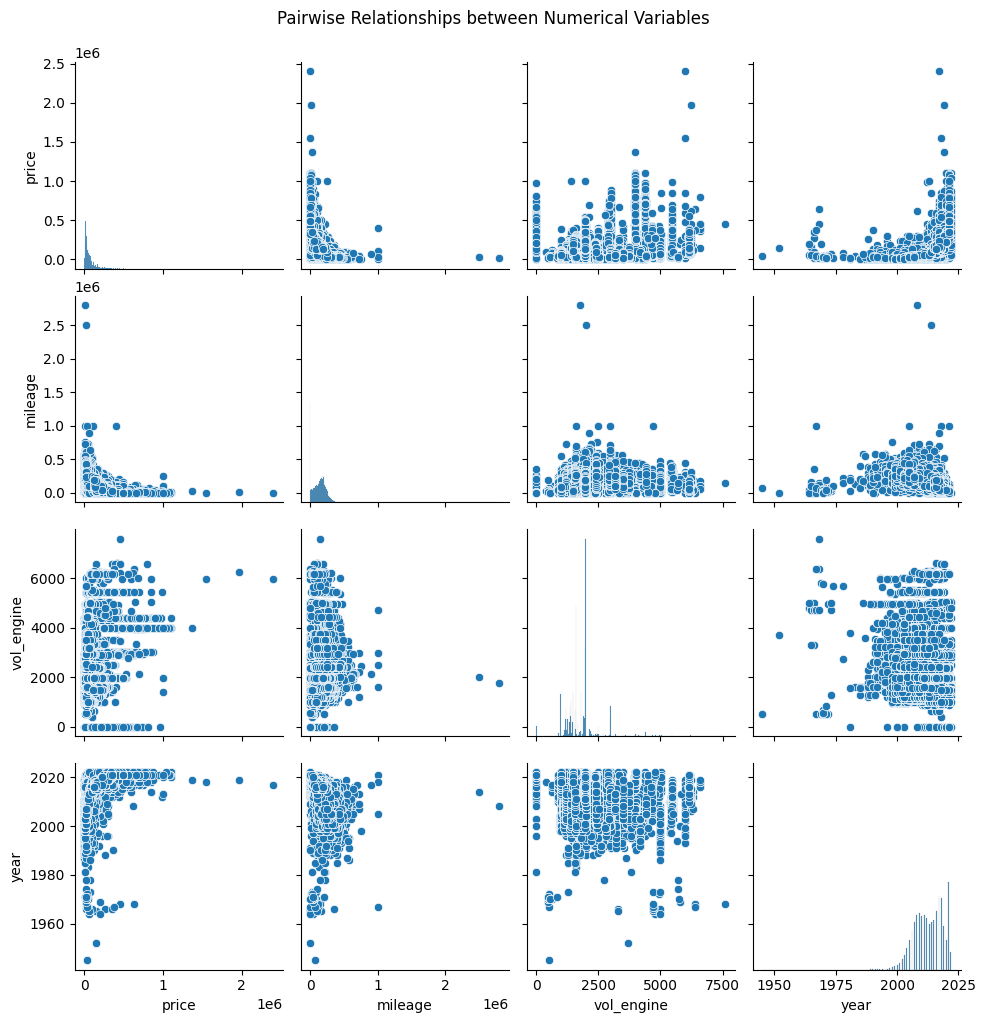

In [63]:
sns.pairplot(data[['price', 'mileage', 'vol_engine', 'year']])
plt.suptitle('Pairwise Relationships between Numerical Variables', y=1.02)
plt.show()

C:\Users\Touunix\AppData\Local\Temp\ipykernel_2796\649155860.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='fuel', y='price', data=data, palette='viridis')


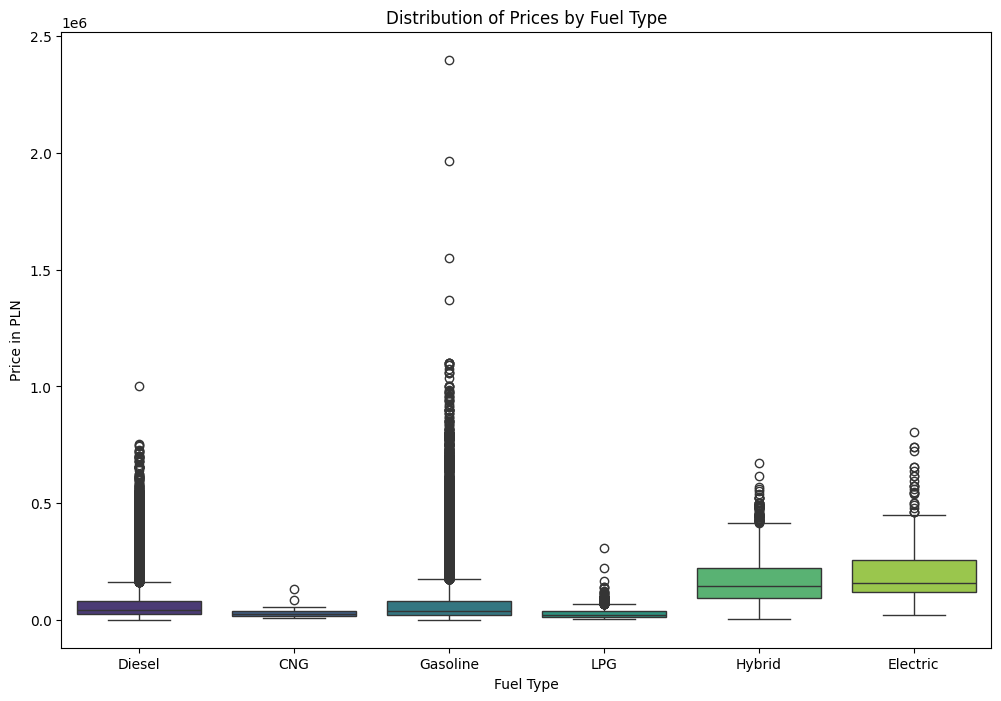

In [65]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='fuel', y='price', data=data, palette='viridis')
plt.title('Distribution of Prices by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Price in PLN')
plt.show()

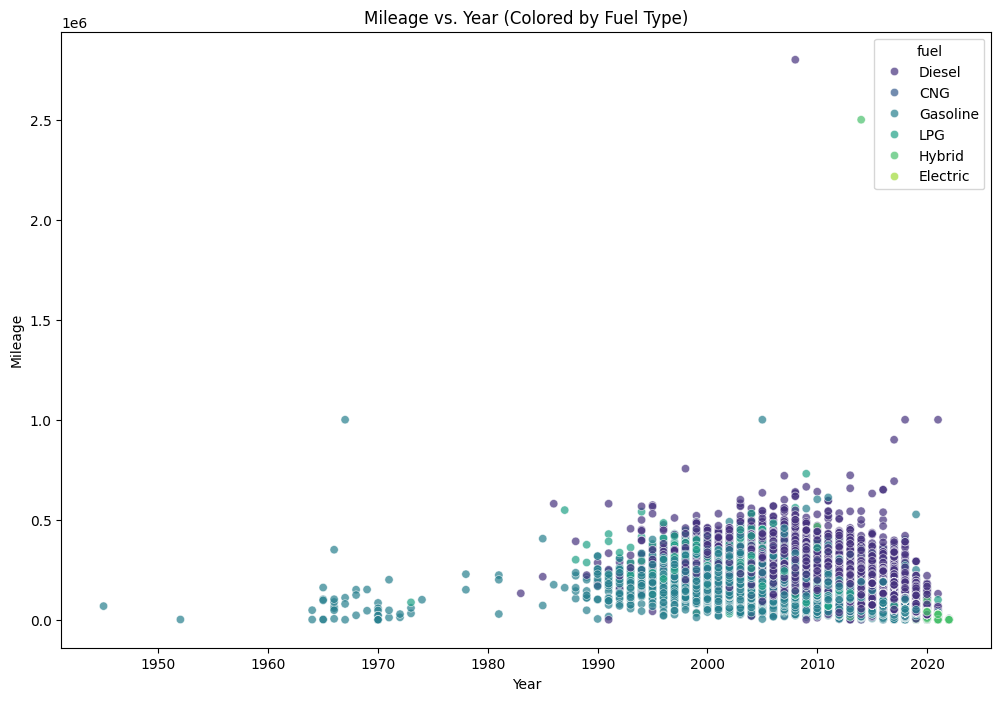

In [67]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='year', y='mileage', hue='fuel', data=data, palette='viridis', alpha=0.7)
plt.title('Mileage vs. Year (Colored by Fuel Type)')
plt.xlabel('Year')
plt.ylabel('Mileage')
plt.show()

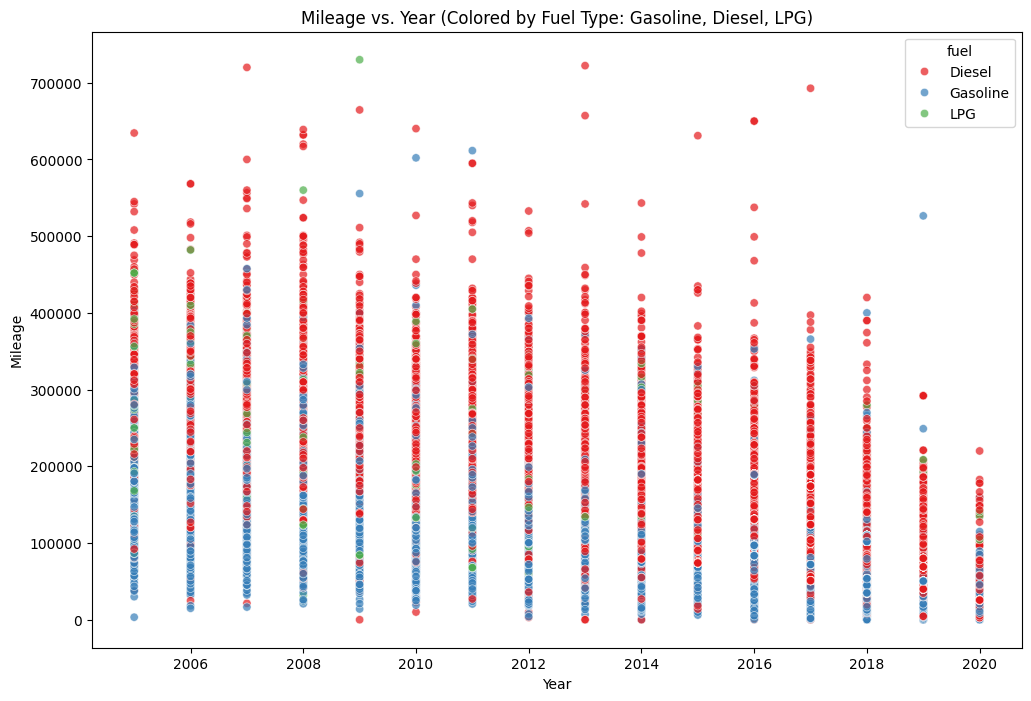

In [92]:
selected_fuels = ['Gasoline', 'Diesel', 'LPG']
filtered_df = data[
    (data['fuel'].isin(selected_fuels)) & 
    (data['year'] >= 2005) & 
    (data['year'] <= 2020) & 
    (data['mileage'] <= 800000)
]

# Scatter plot: Mileage vs. Year, colored by Fuel Type
plt.figure(figsize=(12, 8))
sns.scatterplot(x='year', y='mileage', hue='fuel', data=filtered_df, palette='Set1', alpha=0.7)
plt.title('Mileage vs. Year (Colored by Fuel Type: Gasoline, Diesel, LPG)')
plt.xlabel('Year')
plt.ylabel('Mileage')
plt.show()

According to the above chart we can see that cars produced in 2005-2020 with Diesel fuel type, have more mileage.

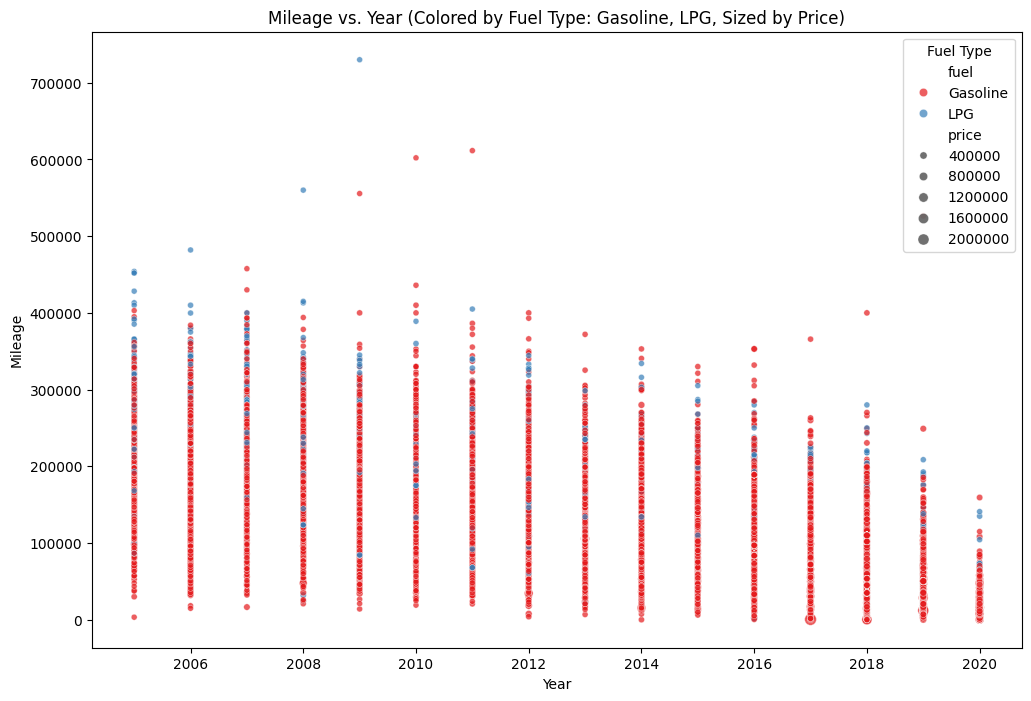

In [105]:
selected_fuels = ['Gasoline', 'LPG']
filtered_df = data[
    (data['fuel'].isin(selected_fuels)) & 
    (data['year'] >= 2005) & 
    (data['year'] <= 2020) & 
    (data['mileage'] <= 800000)
]

plt.figure(figsize=(12, 8))
sns.scatterplot(x='year', y='mileage', hue='fuel', size='price', data=filtered_df, palette='Set1', alpha=0.7)
plt.title('Mileage vs. Year (Colored by Fuel Type: Gasoline, LPG, Sized by Price)')
plt.xlabel('Year')
plt.ylabel('Mileage')
plt.legend(title='Fuel Type', loc='upper right')
plt.show()

In [97]:
sample_df = data.sample(1000)

# Create a 3D scatter plot with Plotly
fig = px.scatter_3d(sample_df, x='mileage', y='year', z='price', color='price',
                    size_max=10, opacity=0.7, labels={'mileage': 'Mileage', 'year': 'Year', 'price_in_pln': 'Price in PLN'})

# Set axis titles and figure title
fig.update_layout(scene=dict(xaxis_title='Mileage', yaxis_title='Year', zaxis_title='Price in PLN'),
                  title='3D Scatter Plot: Mileage, Year, and Price')

# Show the interactive plot
fig.show()

In [102]:
sample_df = data

# Create a 3D scatter plot with Plotly
fig = px.scatter_3d(sample_df, x='year', y='mileage', z='vol_engine', color='price',
                    labels={'vol_engine': 'Engine Capacity', 'mileage': 'Mileage', 'year': 'Price in PLN'})

# Set axis titles and figure title
fig.update_layout(scene=dict(xaxis_title='Year', yaxis_title='Mileage', zaxis_title='Engine Capacity'),
                  title='3D Scatter Plot: Engine Capacity, Mileage, and Price')

# Show the interactive plot
fig.show()

The 